# **1. Instalación de librerias**

In [1]:
# Librerias generales
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar
# Ranom seed
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

from collections import Counter
import unicodedata
import re
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from joblib import dump, load

In [2]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
!pip install langdetect
from langdetect import detect #Para identificar idiomas de textos
from langdetect.lang_detect_exception import LangDetectException

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=dc1e304d5663b7d2481e7b00d975d34d12e9f36f3e3927a9ec587620fc3e69cf
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [4]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator #Libreria para realizar traduccion

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=89ff0abc06016fb889d07fdb74153d8ad5b624876008228a3e834e0ed4ed17c2
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

# **2. Carga de datos**

In [5]:
db_location='/content/tipo2_entrenamiento_estudiantes.csv'
db_pred_location='/content/particion_prueba_estudiantes.csv'
dataFrame=pd.read_csv(db_location, sep=',', encoding = "UTF-8")
df_pred=pd.read_csv(db_pred_location, sep=',', encoding = "UTF-8")
data=dataFrame

# **3. Entendimiento**

Se va a realizar un manejo básico de lso datos para identificar diferentes estadisticas e información general acerca de las reseñas

In [6]:
data.shape

(7875, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


In [8]:
data

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3
...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4
7871,"Fue una escapada de un día desde el complejo, ...",4
7872,La Plaza de la Revolución es un lugar emblemát...,3
7873,Es la segunda ocasión que me quedo en los cuar...,1


In [9]:
def moda_palabras(review):
    palabras = review.split()
    moda = Counter(palabras).most_common(1)
    return moda[0][0] if moda else None

In [10]:
textos = data.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]
textos['Moda'] = [moda_palabras(i) for i in textos['Review']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos

,Review,Class,Conteo,Moda,Max,Min
0,Muy buena atención y aclaración de dudas por p...,5,252,de,20,0
1,Buen hotel si están obligados a estar cerca de...,3,297,de,13,1
2,"Es un lugar muy lindo para fotografías, visite...",5,104,Es,12,1
3,Abusados con la factura de alimentos siempre s...,3,422,y,14,1
4,Tuvimos un par de personas en el grupo que rea...,3,419,el,14,1
...,...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,113,el,11,2
7871,"Fue una escapada de un día desde el complejo, ...",4,261,de,12,2
7872,La Plaza de la Revolución es un lugar emblemát...,3,777,de,14,1
7873,Es la segunda ocasión que me quedo en los cuar...,1,651,que,12,0


Se evidencia que la moda de las palabras son stopwords que no ofrecen ningún tipo de información para el modelo. Por ello se van a eliminar en la preparación de datos.

In [11]:
#identificar idiomas
textos['idioma']=[detect(x) for x in textos['Review']]

In [12]:
textos

,Review,Class,Conteo,Moda,Max,Min,idioma
0,Muy buena atención y aclaración de dudas por p...,5,252,de,20,0,es
1,Buen hotel si están obligados a estar cerca de...,3,297,de,13,1,es
2,"Es un lugar muy lindo para fotografías, visite...",5,104,Es,12,1,es
3,Abusados con la factura de alimentos siempre s...,3,422,y,14,1,es
4,Tuvimos un par de personas en el grupo que rea...,3,419,el,14,1,es
...,...,...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,113,el,11,2,es
7871,"Fue una escapada de un día desde el complejo, ...",4,261,de,12,2,es
7872,La Plaza de la Revolución es un lugar emblemát...,3,777,de,14,1,es
7873,Es la segunda ocasión que me quedo en los cuar...,1,651,que,12,0,es


Se utilizo la libreria langdetect con el fin de identificar el idioma en el cual se encuentra la reseña. Esto con el fin de identificar si hay que realizar algun tratamiento con respecto a la traducción de ciertas reseñas.

In [13]:
idioma=textos[textos['idioma'] != 'es']
idioma

,Review,Class,Conteo,Moda,Max,Min,idioma
711,mas o menos estan mejor las de saltillo lñdkjv...,2,116,mas,76,1,sq
873,Nada de opciones de vinos por copeo solo 1! /\...,1,105,de,12,1,pt
3749,First part of the tour was Rivera's actual hom...,2,351,of,10,2,en
4490,esta rico,4,9,esta,4,4,it
6518,A few months after ciudad perdida we keep on t...,5,394,a,14,1,en
6869,Cementerio Antiguo. Patrimonio Mundial. facil ...,5,102,Cementerio,10,2,it
7455,This university is unique around the world. Th...,5,213,is,12,2,en


Se evidencia que las reseñas se encuntran en otros idiomas diferentes al español. Aunque los que se identifica diferente a ingles se evidencia que estan en español.

In [14]:
col=['Class']
textos[col].describe()

,Class
count,7875.000000
mean,3.502603
std,1.320435
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Se verifico la columna de class con el fin de mirar que todos los valores dados esten dentro del rango especificado. Como se evidencia en la tabla esto es verdadero.

# **4. Preparación**

Para la preparación de los datos se van a realizar 3 etapas:

1. Traducción
2. Tokenización
3. Normalización

##**4.1 Traducción**

Por medio de la libreria googletrans se va a realizar una traducción de las reseñas que estan en ingles. Esto se debe a que las reseñas que en el entendimiento capto en otro idioma (como italiano) realmente se encontraban en español por lo que no es necesario realizar una traducción.

In [15]:
def traducir(row):
    review = row['Review']
    idioma = row['idioma']
    if idioma == 'en':
        translator = Translator()
        traduccion = translator.translate(review, src=idioma, dest='es')
        return traduccion.text
    else:
        return review

textos['Review'] = textos.apply(traducir, axis=1)

In [16]:
idioma=textos[textos['idioma'] != 'es']
idioma

,Review,Class,Conteo,Moda,Max,Min,idioma
711,mas o menos estan mejor las de saltillo lñdkjv...,2,116,mas,76,1,sq
873,Nada de opciones de vinos por copeo solo 1! /\...,1,105,de,12,1,pt
3749,La primera parte de la gira fue el hogar real ...,2,351,of,10,2,en
4490,esta rico,4,9,esta,4,4,it
6518,"Unos meses después de Ciudad Perdida, seguimos...",5,394,a,14,1,en
6869,Cementerio Antiguo. Patrimonio Mundial. facil ...,5,102,Cementerio,10,2,it
7455,Esta universidad es única en todo el mundo.¡La...,5,213,is,12,2,en


In [17]:
cols=['Review','Class']
data=textos[cols]

##**4.2 Tokenización**

En este punto se va a dividir los textos en palabras individuales por lo que cada token va a representar una palabra de la reseña. Al dividir el texto en tokens, se simplifica la tarea de limpieza y normalización, ya que se puede aplicar cada paso de preprocesamiento de manera individual a cada token

In [18]:
data['words'] = [nltk.word_tokenize(x) for x in data['Review']]

<ipython-input-18-e2126c2407d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['words'] = [nltk.word_tokenize(x) for x in data['Review']]


In [19]:
cols=['words','Class']
data=data[cols]
data

,words,Class
0,"[Muy, buena, atención, y, aclaración, de, duda...",5
1,"[Buen, hotel, si, están, obligados, a, estar, ...",3
2,"[Es, un, lugar, muy, lindo, para, fotografías,...",5
3,"[Abusados, con, la, factura, de, alimentos, si...",3
4,"[Tuvimos, un, par, de, personas, en, el, grupo...",3
...,...,...
7870,"[Me, parece, buen, sistema, ,, agiliza, el, tr...",4
7871,"[Fue, una, escapada, de, un, día, desde, el, c...",4
7872,"[La, Plaza, de, la, Revolución, es, un, lugar,...",3
7873,"[Es, la, segunda, ocasión, que, me, quedo, en,...",1


##**4.3 Normalización**

Para este punto se va a realizar el siguiente tratamiento a cada uno de los tokens de las reseñas:
1. Convertir el texto a minuscula.
2. eliminar caracteres no alfabeticos.
3. Eliminar espacios en blanco adicionales.
4. Eliminar stopwords
5. Lematización
6. Normalización números

### **4.3.1 Convertir el texto a minuscula**

In [20]:
data['words'] = [[word.lower() for word in row] for row in data['words']]
data

,words,Class
0,"[muy, buena, atención, y, aclaración, de, duda...",5
1,"[buen, hotel, si, están, obligados, a, estar, ...",3
2,"[es, un, lugar, muy, lindo, para, fotografías,...",5
3,"[abusados, con, la, factura, de, alimentos, si...",3
4,"[tuvimos, un, par, de, personas, en, el, grupo...",3
...,...,...
7870,"[me, parece, buen, sistema, ,, agiliza, el, tr...",4
7871,"[fue, una, escapada, de, un, día, desde, el, c...",4
7872,"[la, plaza, de, la, revolución, es, un, lugar,...",3
7873,"[es, la, segunda, ocasión, que, me, quedo, en,...",1


### **4.3.2 Eliminar caracteres no alfabeticos**

In [21]:
data['words'] = data['words'].apply(lambda x: [re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s]', '', word) for word in x])
data

,words,Class
0,"[muy, buena, atención, y, aclaración, de, duda...",5
1,"[buen, hotel, si, están, obligados, a, estar, ...",3
2,"[es, un, lugar, muy, lindo, para, fotografías,...",5
3,"[abusados, con, la, factura, de, alimentos, si...",3
4,"[tuvimos, un, par, de, personas, en, el, grupo...",3
...,...,...
7870,"[me, parece, buen, sistema, , agiliza, el, tra...",4
7871,"[fue, una, escapada, de, un, día, desde, el, c...",4
7872,"[la, plaza, de, la, revolución, es, un, lugar,...",3
7873,"[es, la, segunda, ocasión, que, me, quedo, en,...",1


### **4.3.3 Eliminar espacios en blanco**

In [22]:
data['words'] = data['words'].apply(lambda x: [word for word in " ".join(x).split()])
data

,words,Class
0,"[muy, buena, atención, y, aclaración, de, duda...",5
1,"[buen, hotel, si, están, obligados, a, estar, ...",3
2,"[es, un, lugar, muy, lindo, para, fotografías,...",5
3,"[abusados, con, la, factura, de, alimentos, si...",3
4,"[tuvimos, un, par, de, personas, en, el, grupo...",3
...,...,...
7870,"[me, parece, buen, sistema, agiliza, el, trans...",4
7871,"[fue, una, escapada, de, un, día, desde, el, c...",4
7872,"[la, plaza, de, la, revolución, es, un, lugar,...",3
7873,"[es, la, segunda, ocasión, que, me, quedo, en,...",1


### **4.3.4 Eliminar stopwords**

In [23]:
stopwords_es = set(stopwords.words('spanish'))
data['words']=data['words'].apply(lambda x: [word for word in x if word.lower() not in stopwords_es])
data

,words,Class
0,"[buena, atención, aclaración, dudas, parte, se...",5
1,"[buen, hotel, si, obligados, cerca, centro, co...",3
2,"[lugar, lindo, fotografías, visiten, selina, m...",5
3,"[abusados, factura, alimentos, siempre, echan,...",3
4,"[par, personas, grupo, realmente, queríamos, c...",3
...,...,...
7870,"[parece, buen, sistema, agiliza, transporte, c...",4
7871,"[escapada, día, complejo, grupo, turistas, guí...",4
7872,"[plaza, revolución, lugar, emblemático, identi...",3
7873,"[segunda, ocasión, quedo, cuartos, area, jardí...",1


### **4.3.5 Lematización**

In [24]:
stemmer = SnowballStemmer('spanish')
data['words'] = data['words'].apply(lambda words: [stemmer.stem(word) for word in words])
data

,words,Class
0,"[buen, atencion, aclar, dud, part, señorit, ve...",5
1,"[buen, hotel, si, oblig, cerc, centr, convenci...",3
2,"[lug, lind, fotograf, visit, selin, music, viv...",5
3,"[abus, factur, aliment, siempr, echan, culp, v...",3
4,"[par, person, grup, realment, quer, com, cabri...",3
...,...,...
7870,"[parec, buen, sistem, agiliz, transport, conec...",4
7871,"[escap, dia, complej, grup, turist, gui, infor...",4
7872,"[plaz, revolu, lug, emblemat, identif, haban, ...",3
7873,"[segund, ocasion, qued, cuart, are, jardin, co...",1


### **4.3.6 Normalización números**

In [25]:
def normalize_numbers(words):
    new_words = []
    for word in words:
        if re.match(r'^-?\d+(?:\.\d+)?$', word):
            new_words.append('NUM')
        else:
            new_words.append(word)
    return new_words

In [26]:
data['words'] = data['words'].apply(normalize_numbers)
data

,words,Class
0,"[buen, atencion, aclar, dud, part, señorit, ve...",5
1,"[buen, hotel, si, oblig, cerc, centr, convenci...",3
2,"[lug, lind, fotograf, visit, selin, music, viv...",5
3,"[abus, factur, aliment, siempr, echan, culp, v...",3
4,"[par, person, grup, realment, quer, com, cabri...",3
...,...,...
7870,"[parec, buen, sistem, agiliz, transport, conec...",4
7871,"[escap, dia, complej, grup, turist, gui, infor...",4
7872,"[plaz, revolu, lug, emblemat, identif, haban, ...",3
7873,"[segund, ocasion, qued, cuart, are, jardin, co...",1


## **4.4 Bag of word**

El algoritmo bag of word convierte documentos de texto en vectores numéricos representando la frecuencia de ocurrencia de cada palabra en el documento. BoW es útil para la tarea de categorización de textos porque ignora el orden y la estructura gramatical del texto, centrándose únicamente en la presencia o ausencia de palabras clave. Esto permite una representación eficiente de los documentos y simplifica la tarea de clasificación al convertirla en un problema de asignación de vectores a categorías. Aunque BoW pierde información semántica y contextual, su simplicidad y eficacia lo hacen ampliamente utilizado en la clasificación de texto.

In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(words) for words in data['words']])
y = data['Class']

## **4.5 Entrenamiento y test**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **5. Implementación de modelos**

## **5.1 Support vector machine (SVM)**

Su objetivo es encontrar un hiperplano en un espacio de características que maximice el margen entre las clases de datos, donde el margen es la distancia entre el hiperplano y los puntos de datos más cercanos de cada clase, conocidos como vectores de soporte. SVM funciona encontrando el hiperplano óptimo que separa las clases de datos utilizando una función de pérdida, generalmente la pérdida de bisagra, que penaliza las clasificaciones incorrectas.

In [29]:
svm=SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
y_pred = svm.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)

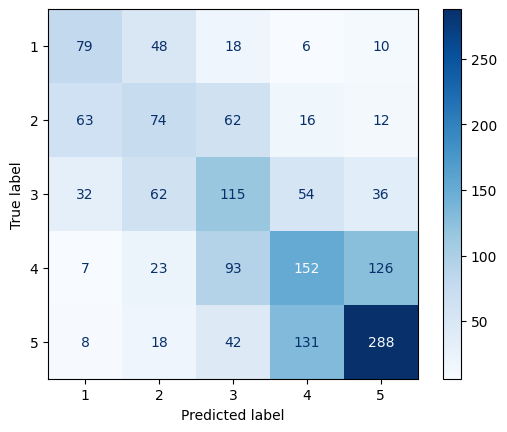

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [33]:
report_svm = classification_report(y_test, y_pred)
print("Test Report for SVM\n", report_svm)

Test Report for SVM
               precision    recall  f1-score   support

           1       0.42      0.49      0.45       161
           2       0.33      0.33      0.33       227
           3       0.35      0.38      0.37       299
           4       0.42      0.38      0.40       401
           5       0.61      0.59      0.60       487

    accuracy                           0.45      1575
   macro avg       0.43      0.43      0.43      1575
weighted avg       0.45      0.45      0.45      1575



Palabras seleccionadas para representar las reseñas

In [34]:
coeficientes = svm.coef_.toarray()[0]

In [35]:
vocabulario = vectorizer.get_feature_names_out()
coeficientes_palabras = pd.DataFrame({'Palabra': vocabulario, 'Coeficiente': coeficientes})

In [36]:
palabras_importancia = coeficientes_palabras.sort_values(by='Coeficiente', ascending=False)

In [37]:
palabras_importancia.head(10)

,Palabra,Coeficiente
12450,tibi,0.772680
3376,cuch,0.747528
13218,vidaademas,0.738099
5412,favor,0.727310
80,acab,0.693633
6567,ido,0.688011
9302,paisaj,0.682950
1023,asco,0.657932
2131,capacit,0.629000
11868,sombrer,0.628034


## **5.2 Regresión logística**

In [38]:
lr= LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_pred = lr.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)

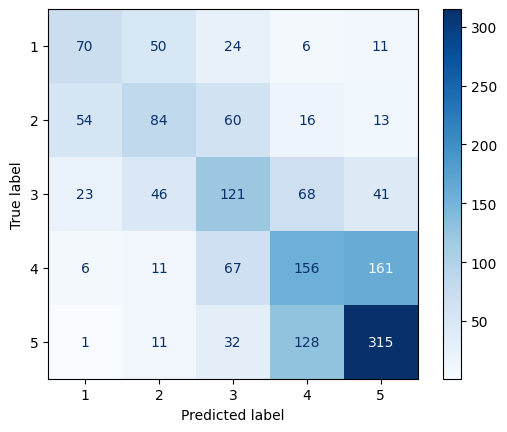

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [42]:
report_lr = classification_report(y_test, y_pred)
print("Test Report for Logistic Regression\n", report_lr)

Test Report for Logistic Regression
               precision    recall  f1-score   support

           1       0.45      0.43      0.44       161
           2       0.42      0.37      0.39       227
           3       0.40      0.40      0.40       299
           4       0.42      0.39      0.40       401
           5       0.58      0.65      0.61       487

    accuracy                           0.47      1575
   macro avg       0.45      0.45      0.45      1575
weighted avg       0.47      0.47      0.47      1575



In [43]:
coeficientes = lr.coef_[0]
palabras = vectorizer.get_feature_names_out()
palabra_coeficiente = dict(zip(palabras, coeficientes))
palabra_coeficiente_ordenado = sorted(palabra_coeficiente.items(), key=lambda x: abs(x[1]), reverse=True)
for palabra, coeficiente in palabra_coeficiente_ordenado[:10]:
    print(f"Palabra: {palabra}, Coeficiente: {coeficiente}")

Palabra: pesim, Coeficiente: 1.8977121005357385
Palabra: horribl, Coeficiente: 1.6170797320890469
Palabra: peor, Coeficiente: 1.473694346932929
Palabra: impresion, Coeficiente: -1.2003909377443833
Palabra: histori, Coeficiente: -1.1294820481075072
Palabra: desastr, Coeficiente: 1.1098651177014955
Palabra: engañ, Coeficiente: 1.1055275711065575
Palabra: lament, Coeficiente: 1.1031055536914238
Palabra: excelent, Coeficiente: -1.0903586107181638
Palabra: rot, Coeficiente: 1.0821699282747432


Lo que representa el coeficiente es cuando impacto tiene una palabra en la probabilidad que una reseña sea clasificada a cierta clase.

Las palabras que tienen coeficientes positivos sugieren que si estas palabras están presentes en una reseña, el modelo es más propenso a clasificarla como una reseña con una calificación baja o negativa.

Por otro lado, las palabras que tienen coeficientes negativos significativos sugieren que si estas palabras están presentes en una reseña, el modelo es menos propenso a clasificarla como una reseña con una calificación baja o negativa, y podría indicar reseñas con calificaciones más altas.

## **5.3 Naive Bayes**

Naive Bayes es un algoritmo de aprendizaje supervisado basado en el teorema de Bayes. Se utiliza principalmente para la clasificación de datos. Su "naive" (ingenuo) viene de la suposición de independencia condicional entre las características, lo que significa que asume que todas las características son independientes entre sí dado el valor de la clase.

El algoritmo calcula la probabilidad de que una instancia pertenezca a una determinada clase basándose en la probabilidad condicional de las características dadas las clases. Luego, clasifica la instancia en la clase con la probabilidad más alta.

Es simple, eficiente y funciona bien en conjuntos de datos con muchas características, como el análisis de texto. Es especialmente útil cuando se tienen datos de alta dimensionalidad como el bag of words generado a partir de reseñas turísticas.

In [44]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [45]:
y_pred_nb = nb_classifier.predict(X_test)

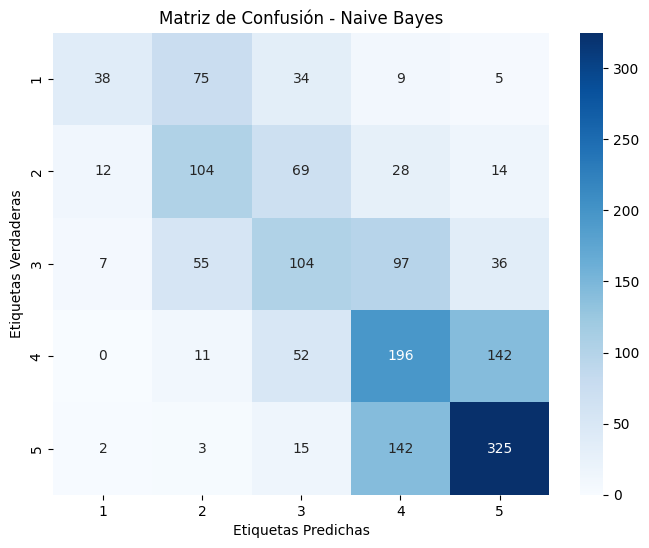

In [46]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Naive Bayes")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=[1, 2, 3, 4, 5])
plt.show()

In [47]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.48698412698412696
              precision    recall  f1-score   support

           1       0.64      0.24      0.35       161
           2       0.42      0.46      0.44       227
           3       0.38      0.35      0.36       299
           4       0.42      0.49      0.45       401
           5       0.62      0.67      0.64       487

    accuracy                           0.49      1575
   macro avg       0.50      0.44      0.45      1575
weighted avg       0.50      0.49      0.48      1575



In [48]:
vocabulario = vectorizer.vocabulary_
palabras_ordenadas = sorted(vocabulario, key=lambda palabra: vocabulario[palabra])
print("Palabras utilizadas por el modelo para la clasificación:")
print(palabras_ordenadas)

Palabras utilizadas por el modelo para la clasificación:
['aa', 'ab', 'abaceri', 'abad', 'abaj', 'abajomas', 'abajotambien', 'abalanz', 'abander', 'abandon', 'abarc', 'abarrot', 'abast', 'abastec', 'abedul', 'abej', 'abertur', 'abiert', 'abierton', 'abigail', 'abismal', 'abit', 'abofete', 'aboleng', 'abon', 'abond', 'abord', 'aborigen', 'abort', 'aboved', 'abra', 'abrac', 'abraham', 'abran', 'abras', 'abrasador', 'abraz', 'abrazogregor', 'abre', 'abren', 'abres', 'abrevader', 'abri', 'abriend', 'abriendol', 'abrier', 'abrieron', 'abries', 'abrig', 'abril', 'abrir', 'abrirl', 'abrirn', 'abrirs', 'abro', 'abrogat', 'abrum', 'abs', 'absid', 'absolut', 'absolutamemt', 'absolutomas', 'absorb', 'absten', 'abstract', 'absurd', 'abuch', 'abuel', 'abund', 'abundantehabi', 'abur', 'aburr', 'aburridoel', 'aburridor', 'aburrir', 'aburriri', 'aburrirt', 'abus', 'ac', 'aca', 'acab', 'acabari', 'academ', 'academi', 'acalor', 'acamp', 'acantil', 'acapulc', 'acarici', 'acarr', 'acarre', 'acas', 'acced'

In [49]:
log_probabilidades = nb_classifier.feature_log_prob_

vocabulario = vectorizer.get_feature_names_out()

palabras_log_probabilidad = [(palabra, log_probabilidad) for palabra, log_probabilidad in zip(vocabulario, log_probabilidades[1])]

palabras_log_probabilidad_ordenadas = sorted(palabras_log_probabilidad, key=lambda x: x[1], reverse=True)

print("Palabras más importantes y sus log probabilidades:")
for palabra, log_probabilidad in palabras_log_probabilidad_ordenadas[:10]:
    print(f"Palabra: {palabra}, Log Probabilidad: {log_probabilidad}")


Palabras más importantes y sus log probabilidades:
Palabra: hotel, Log Probabilidad: -4.265579302953232
Palabra: habit, Log Probabilidad: -4.469826220376152
Palabra: com, Log Probabilidad: -4.863051273589815
Palabra: buen, Log Probabilidad: -4.984490620449309
Palabra: mal, Log Probabilidad: -5.03231970813919
Palabra: servici, Log Probabilidad: -5.079526112708987
Palabra: si, Log Probabilidad: -5.082551833625524
Palabra: sol, Log Probabilidad: -5.215217799973617
Palabra: lug, Log Probabilidad: -5.222162272326428
Palabra: lleg, Log Probabilidad: -5.392706761929363


En un clasificador Naive Bayes multinomial, las log probabilidades representan el logaritmo de la probabilidad de observar una palabra dada una clase específica. Aunque las log probabilidades pueden ser negativas, esto simplemente indica que la probabilidad de la palabra dada esa clase es menor que 1. Las palabras con log probabilidades más negativas son más importantes para la clasificación de la clase, mientras que las menos negativas o positivas tienen menos influencia pero aún contribuyen al proceso de clasificación. Estas log probabilidades son útiles para identificar las palabras más relevantes en la clasificación y comprender cómo el modelo toma decisiones.

# **6. Etapa 2**
# Automatización del modelo y persistencia

Seleccionamos el modelo de regresión logística dado que es el que tiene mejores métricas.Procedemos a automatizar la aplicación del modelo con un pipeline.

In [57]:
stemmer = SnowballStemmer('spanish')
stop_words = set(stopwords.words('spanish'))
translator = Translator()

def translate_if_needed(text):
  language = detect(text)
  if language == 'en':
      translated_text = translator.translate(text, src='en', dest='es').text
      return translated_text
  else:
      return text

def normalize_numbers(text):
    text = re.sub(r'\b\d+(?:\.\d+)?\b', 'NUM', text)
    return text

def preprocessing(text):
    # Traducción si es necesario
    text = [translate_if_needed(t) for t in text]
    # Normalizar números
    text = [normalize_numbers(t) for t in text]
    # Tokenización
    tokens = [nltk.word_tokenize(t) for t in text]
    # Convertir a minúscula
    tokens = [[word.lower() for word in row] for row in tokens]
    # Eliminar caracteres no alfabéticos
    tokens = [[re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s]', '', word) for word in row] for row in tokens]
    # Unir palabras en cadenas de texto
    tokens = [' '.join(row) for row in tokens]
    # Eliminar stop words
    tokens = [[word for word in row.split() if word.lower() not in stop_words] for row in tokens]
    # Lematización
    tokens = [[stemmer.stem(word) for word in row] for row in tokens]
    # Unir las palabras lematizadas en cadenas de texto
    tokens = [' '.join(row) for row in tokens]
    return tokens

pipeline = Pipeline([
    ('preprocesamiento', FunctionTransformer(preprocessing)),
    ('vectorizador', CountVectorizer()),  # Convertir texto en vectores de palabras
    ('regresion_logistica', LogisticRegression())  # Modelo de regresión logística
])


In [51]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame['Review'], dataFrame['Class'], test_size=0.2, random_state=42)

In [58]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocesamiento',
                 FunctionTransformer(func=<function preprocessing at 0x79286f4f3c70>)),
                ('vectorizador', CountVectorizer()),
                ('regresion_logistica', LogisticRegression())])

Persistencia del modelo en un archivo .joblib

In [62]:
filename = "model.joblib"

In [63]:
dump(pipeline, filename)

['model.joblib']